# Assignment 1:  Review of Python, functions, plotting, numerical derivatives

Write and run python scripts that do the following. Upload the notebook file to the eclass page.

1.  Write a script that calculates and plots sines and cosines for 100 points between 0 and 2$\pi$

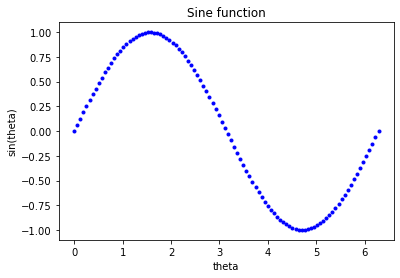

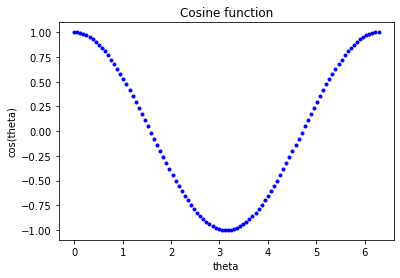

In [35]:
# Calculation and plot of sines and cosines for 100 points between 0 and 2$\pi\$

#-----------------------------------------------------------------------
# Import libraries.
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------
# Create variable arrays.
theta = np.linspace(0, 2*np.pi,100); # Angle from 0 to 2$\pi$ radians

# Calculate sines and cosines.
sine = np.sin(theta);
cosine = np.cos(theta);

#-----------------------------------------------------------------------
# Plot the graphs and print results.

# Sines.
plt.plot(theta, sine, 'b.')
plt.xlabel('theta')
plt.ylabel('sin(theta)')
plt.title('Sine function')
plt.show()
#print('sin(0 < $\theta$ < 2$\pi$)', sine)

# Cosines.
plt.plot(theta, cosine, 'b.')
plt.xlabel('theta')
plt.ylabel('cos(theta)')
plt.title('Cosine function')
plt.show()
#print('cos(0 < $\theta$ < 2$\pi$)', cosine)

2.  Calculate and plot the numerical derivative of the function:
$$f(x)=x^2+2\sin x$$
over the same interval and for 100 points using the finite difference equation:$$f'(x)\approx\frac{f(x+h)-f(x)}{h}$$.

Calculate the derivative using h=0.1, 0.00001,1e-9, and 1e-13.

For each value of h, plot the difference between your numerical derivative and the analytical derivative:$$\delta(x)= f'(x)-2x-2\cos x.$$  Also calculate the rms deviation for your 100 points:$$\rm{RMS}=\frac{1}{100}\sum(f'(x)-2x-2\cos x)^2$$


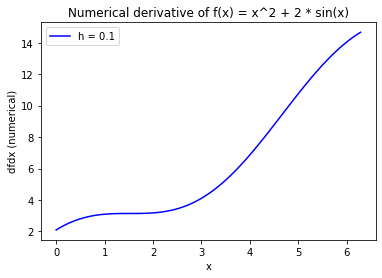

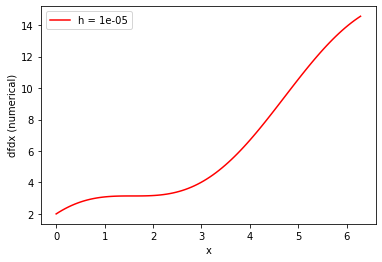

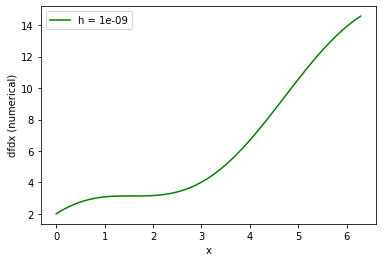

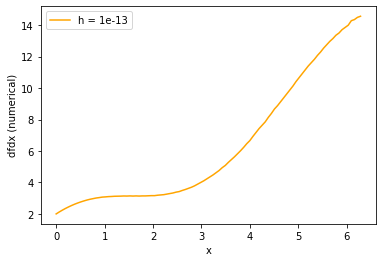

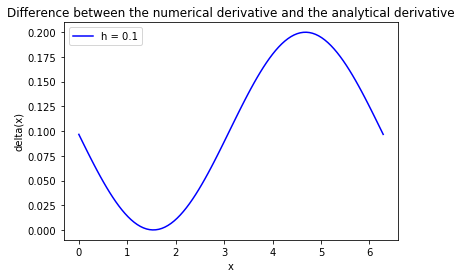

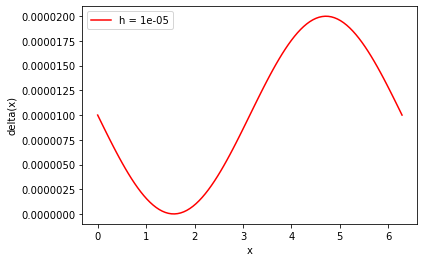

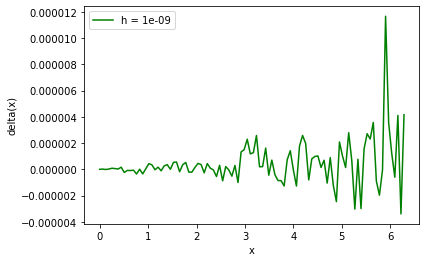

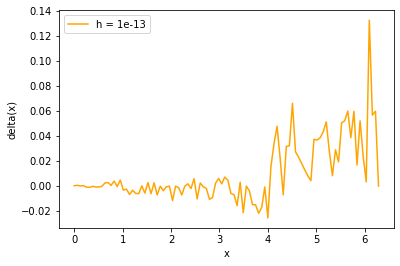

RMS deviation:
RMS(h = 0.1) = 0.12223214942609896
RMS(h = 1e-05) = 1.2226800815589822e-05
RMS(h = 1e-09) = 1.795815357909395e-06
RMS(h = 1e-13) = 0.026184130510064196


In [36]:
# Calculates numerical derivative of the function f(x) = x^2 + 2 * sin(x)
# for different step values h.

#-----------------------------------------------------------------------
# Import libraries.
import numpy as np
import matplotlib.pyplot as plt

# Create class to be used to solve problems 2, 3, and 4.
class problem2: 
    def __init__ (self, x, h, dfdx_N, f):          # Calculates delta(x), RMS deviation, and
                                                   # performs plots of numerical derivatives
                                                   # and delta(x) as functions of x.

        #-----------------------------------------------------------------------
        # Define derivative formulas.
        
        # (See the end of this code block for numerical derivative formula).

        # Analytical derivative of f(x) as defined above:
        def dfdx_Analytical(x):
            dfdx_A = 2 * x + 2 * np.cos(x);
            return (dfdx_A)

        dfdx_A =  [];                              # List to store analytical derivative values.
        for i in range(0, len(x)):
            dfdx_A.append(dfdx_Analytical(x[i]))   # Store analytical derivative values.

        #-----------------------------------------------------------------------
        # Difference between numerical derivative and analytical derivative.

        delta = {};                                # Dictionary to store difference between numerical
                                                   # derivative values and analytical derivative values
                                                   # per h value.
        for i in range(0, len(h)):
            delta['h' + str(i)] = np.subtract(dfdx_N['h' + str(i)], dfdx_A)

        #-----------------------------------------------------------------------
        # RMS deviation for 100 points.

        RMS = {};                                  # Dictionary to store RMS deviation per h value.
        for i in range(0, len(h)):
            RMS['h' + str(i)] = np.sqrt((1 / 100) * np.sum(np.power(delta['h' + str(i)], 2)));
                                                   # Store RMS values.

        #-----------------------------------------------------------------------
        # Plot and print results.
        
        colors = ['blue', 'red', 'green', 'orange']
                                                   # To distinguish between plots for different h values.
    
        # (i) Plot the numertical derivative of the function f(x) = x^2 + 2 * sin(x).
        for i in range(0, len(h)):
            
            fig1 = plt.plot(x, dfdx_N['h' + str(i)], label = 'h = ' + str(h[i]), color = colors[i])
            
            # Annotate.
            plt.legend()
            plt.xlabel('x')
            plt.ylabel('dfdx (numerical)')
            
            if i == 0:
                plt.title('Numerical derivative of f(x) = x^2 + 2 * sin(x)')  
                                                   # Print title only once.
            
            plt.show(fig1)
        
        # (ii) Plot the difference between the numerical derivative and the analytical derivative.
        for i in range(0, len(h)):    
        
            fig2 = plt.plot(x, delta['h' + str(i)], label = 'h = ' + str(h[i]), color = colors[i])
            plt.legend()
            plt.xlabel('x')
            plt.ylabel('delta(x)')
            
            if i == 0:
                plt.title('Difference between the numerical derivative and the analytical derivative')
                                                   # Print title only once.
            
            plt.show(fig2)

        # (iii) Print RMS deviation.
        print('RMS deviation:')
        for i in range(0, len(RMS)):
            print('RMS(h = {}) = {}'.format(str(h[i]), str(RMS['h' + str(i)])))
    
#-----------------------------------------------------------------------
# Variable arrays.
x = np.linspace(0, 2 * np.pi, 100);
h = [0.1, 0.00001, 1e-9, 1e-13];

# Define function f(x).
def func(x):                         # Takes variable x as parameter.
    f = x**2 + 2 * np.sin(x);
    return (f)

f = func(x);

# Numerical derivative:
def dfdx_Numerical(f1, f2, h):       # Parameters: f1 = f(x); f2 = f(x + h).
    dfdx_N = (f2 - f1) / h;
    return (dfdx_N)

dfdx_N = {};                         # Dictionary to store numerical derivative values.
for i in range(0, len(h)):
    dfdx_N['h' + str(i)] = [];       # Create a dictionary list entry for every value of h.
    for j in range(0, len(x)):
        dfdx_N['h' + str(i)].append(dfdx_Numerical(func(x[j]), func(x[j] + h[i]), h[i]))
                                     # Store numerical derivative values.

#----------------------------------------------------------------------
# Call class problem2.
problem2(x, h, dfdx_N, f)

3.  Repeat (2), but now with the symmetric derivative:  $$f'(x)\approx\frac{f(x+h)-f(x-h)}{2h}.$$

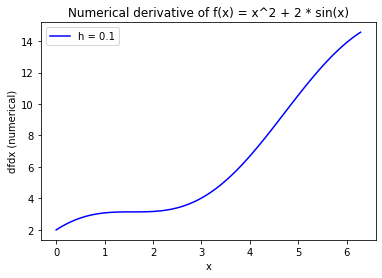

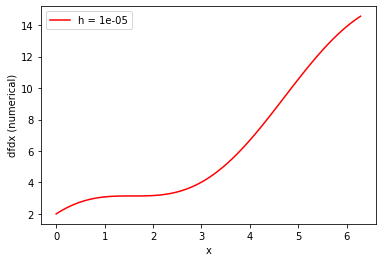

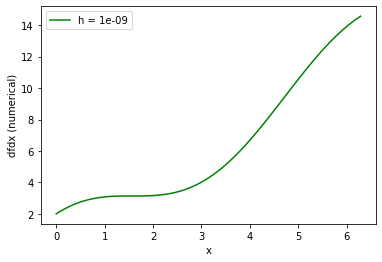

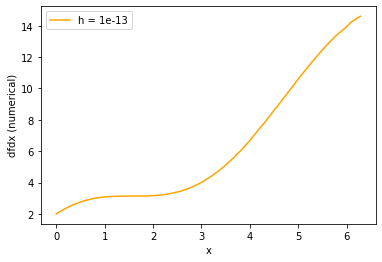

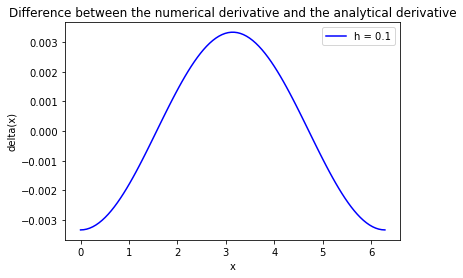

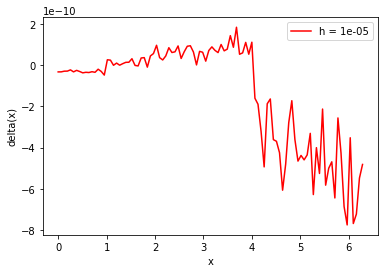

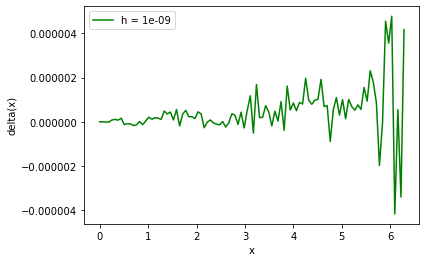

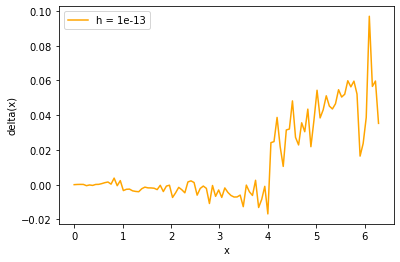

RMS deviation:
RMS(h = 0.1) = 0.0023675942933599563
RMS(h = 1e-05) = 2.8436456244792556e-10
RMS(h = 1e-09) = 1.2324824410159287e-06
RMS(h = 1e-13) = 0.02689578745609304


In [37]:
# Use class in problem 2.
# Modify numerical derivative to a symmetric derivative:
# f'(x) = (f(x + h) - f(x - h)) / 2h

#--------------------------------------------------------------------
# Variable arrays.
x = np.linspace(0, 2 * np.pi, 100);
h = [0.1, 0.00001, 1e-9, 1e-13];

# Define function f(x).
def func(x):                         # Takes variable x as parameter.
    f = x**2 + 2 * np.sin(x);
    return (f)

f = func(x);

# Numerical derivative:
def dfdx_Numerical(f1, f2, h):       # Parameters: f1 = f(x - h); f2 = f(x + h).
    dfdx_N = (f2 - f1) / (2 * h);
    return (dfdx_N)

dfdx_N = {};                         # Dictionary to store numerical derivative values.
for i in range(0, len(h)):
    dfdx_N['h' + str(i)] = [];       # Create a dictionary list entry for every value of h.
    for j in range(0, len(x)):
        dfdx_N['h' + str(i)].append(dfdx_Numerical(func(x[j] - h[i]), func(x[j] + h[i]), h[i]))
                                     # Store numerical derivative values.

#----------------------------------------------------------------------
# Call class problem2.
problem2(x, h, dfdx_N, f)

4.  One way to lose accuracy in calculating derivatives is that, because the way numbers in the computer are represented $$(x+h)-(x-h) \neq 2h$$- and so the denominator in the derivative calculation is not actually the difference between the values at which the function is calculated.  We can get around this by using *exactly representable numbers.*  This works by defining $x_1=x-h, x_2=x+h$ and then calculating $$f'(x)\approx\frac{f(x_2)-f(x_1)}{x_2-x_1}.$$  This works because $x_1$ and $x_2$ exactly represent some numbers- and so we calculate the exact difference for those numbers.

Repeat (3) using this technique.

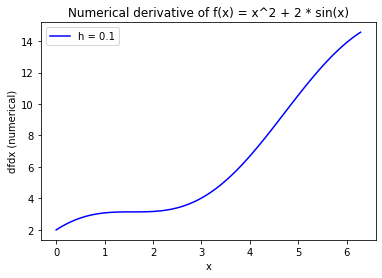

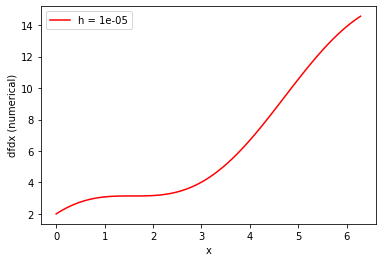

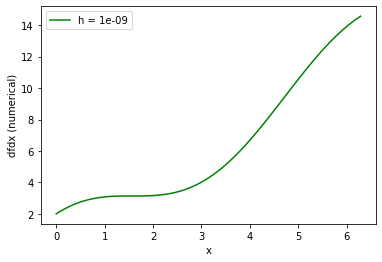

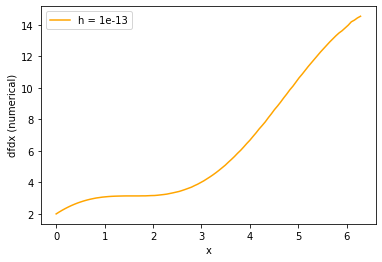

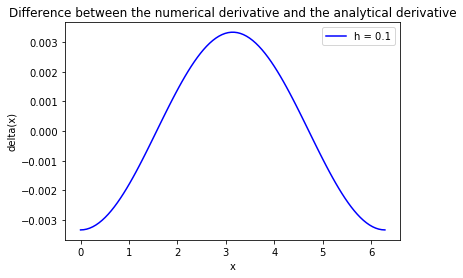

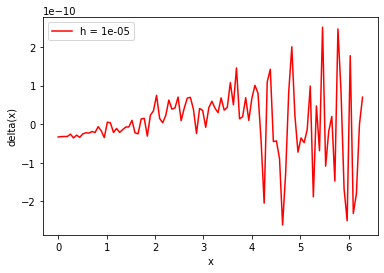

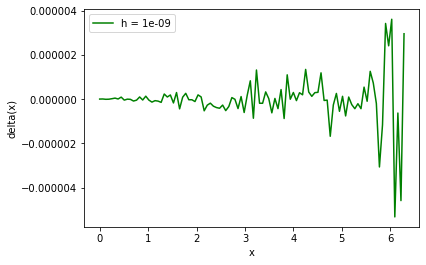

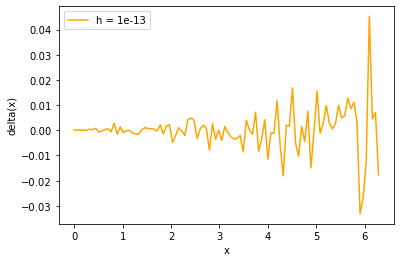

RMS deviation:
RMS(h = 0.1) = 0.002367594293349093
RMS(h = 1e-05) = 8.897200533565805e-11
RMS(h = 1e-09) = 1.0906813137992582e-06
RMS(h = 1e-13) = 0.008459549733405165


In [38]:
# Use class in problem 2.
# Symmetric derivative:
# f'(x) = (f(x2) - f(x1)) / (x2 - x1)
# x2 = x + h, x1 = x - h

#--------------------------------------------------------------------
# Variable arrays.
x = np.linspace(0, 2 * np.pi, 100);
h = [0.1, 0.00001, 1e-9, 1e-13];

# Define function f(x).
def func(x):                             # Takes variable x as parameter.
    f = x**2 + 2 * np.sin(x);
    return (f)

f = func(x);

#--------------------------------------------------------------------
# Numerical derivative:
def dfdx_Numerical(f1, f2, x1, x2):      # Parameters: f1 = f(x - h); f2 = f(x + h).
    dfdx_N = (f2 - f1) / (x2 - x1);
    return (dfdx_N)

dfdx_N = {};                             # Dictionary to store numerical derivative values.
for i in range(0, len(h)):
    dfdx_N['h' + str(i)] = [];           # Create a dictionary list entry for every value of h.
    
    # Define variables; to be used in computation of numerical derivative.
    x1 = np.subtract(x, h[i]);
    x2 = np.add(x, h[i]);
    
    for j in range(0, len(x)):
        dfdx_N['h' + str(i)].append(dfdx_Numerical(func(x1[j]), func(x2[j]), x1[j], x2[j]))
                                         # Store numerical derivative values.
        
        # Check the results.
        #print(2*h[i], x2[j] - x1[j])    # All good!
#----------------------------------------------------------------------
# Call class problem2.
problem2(x, h, dfdx_N, f)

5.  Typically, the precision of physics measurements is a bigger effect than numerical approximation in representing quantities.  We can quantify this, at least for statistical uncertainties, using a random number generator.  Suppose we have data from measurements of a sine wave with noise.  We model this with a function $$d(t)=\sin(t)+a_n R,$$ where $R$ is a random number drawn from a gaussian distribution with $\sigma=1.0$ and $a_n$ is the size of the noise.  (with numpy you can generate such random numbers with numpy.random.randn())

Write a function that calculates d(t), with $a_n=0.05$.  Using the symmetric derivative, plot the RMS deviation between the numerical and analytic derivative: $d'(t)-cos(t)$ for 1000 points between 0 and $\pi$, as a function of $h$. 

Discuss the shape of this curve.  Is there an optimal step size for calculating this derivative? 


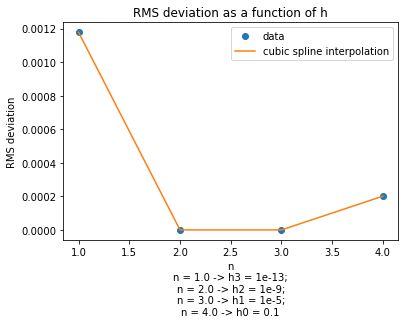

h-values:
h0= 0.1
h1= 1e-05
h2= 1e-09
h3= 1e-13
RMS deviations per h-value:
{'h0': 0.0011785110005326698, 'h1': 1.2027357763183964e-11, 'h2': 1.90457646381047e-08, 'h3': 0.00020124253679391094}


In [39]:
# (i) Function: d(t) = sin(t) + a_n * R

# Define variables and give values to parameters.
t = np.linspace(0, np.pi, 1000);
h = [0.1, 0.00001, 1e-9, 1e-13];   # h-variable array.
an = 0.05;                         # Size of the noise.

R = np.random.randn();             # Generates random number from a Gaussian distribution with
                                   # mean = 0 and sigma = 1.0.

# Define function d(t).
def dfunc(t, an):
    d = np.sin(t) + an * R;
    return(d)

d = dfunc(t, an);                  # Give values to function d.


# (ii) Using the symmertric derivative, plot the RMS deviation between the numerical and analytical
# derivative of d(t) for points between 0 and pi, as a function of h.

# Analytical derivative:
# dddt = cos(t)

# Symmetric derivative (numerical):
# d'(x) = (d(t2) - d(t1)) / (t2 - t1)
# t2 = t + h, t1 = t - h

class problem5:                                   # Calculates delta(t), RMS deviation, and
                                                  # performs plot of RMS deviation as a function
                                                  # of h.
    def __init__ (self, t, h, dddt_N, d):

        #-----------------------------------------------------------------------
        # Define derivative formulas.
        
        # (See the end of this code block for numerical derivative formula).

        # Analytical derivative of d(t) as defined above:
        def dddt_Analytical(t):
            dddt_A = np.cos(t);
            return (dddt_A)

        dddt_A =  [];                              # List to store analytical derivative values.
        for i in range(0, len(t)):
            dddt_A.append(dddt_Analytical(t[i]))   # Store analytical derivative values.

        #-----------------------------------------------------------------------
        # Difference between numerical derivative and analytical derivative.

        delta = {};                                # Dictionary to store difference between numerical
                                                   # derivative values and analytical derivative values
                                                   # per h value.
        for i in range(0, len(h)):
            delta['h' + str(i)] = np.subtract(dddt_N['h' + str(i)], dddt_A);

        #-----------------------------------------------------------------------
        # RMS deviation for 100 points.

        RMS = {};                                  # Dictionary to store RMS deviation per h value.
        RMS_list = [];                             # List of RMS values for plot of RMS deviation
                                                   # as a function of h; elements follow the exact
                                                   # same order as in RMS dictionary.
        for i in range(0, len(h)):
            # Store RMS values
            # in dictionary:
            RMS['h' + str(i)] = np.sqrt((1 / 1000) * np.sum(np.power(delta['h' + str(i)], 2)));
            
            # in list:
            RMS_list.append(np.sqrt((1/1000) * np.sum(np.power(delta['h' + str(i)], 2))));
            

        #-----------------------------------------------------------------------
        # Plot and print results.
        
        # RMS deviation as a function of h.
        n = [1, 2, 3, 4];
        
        from scipy.interpolate import CubicSpline
        cs = CubicSpline(n, RMS_list)         # Cubic spline interpolation.
        
        # Data plot.
        plt.plot(n, RMS_list, 'o', label = 'data')                  # h-values are separated by relatively
                                                                    # large values. Assign an integer to each 
                                                                    # h: n = [1, 2, 3, 4] -> h = [1e-13, 1e-9, 1e-5, 0.1].
        # Cubic spline interpolation plot.
        plt.plot(n, cs(n), label = 'cubic spline interpolation')      
                                                 
        # Annotate.
        plt.legend()
        plt.xlabel('n\nn = 1.0 -> h3 = 1e-13;\nn = 2.0 -> h2 = 1e-9;\nn = 3.0 -> h1 = 1e-5;\nn = 4.0 -> h0 = 0.1\n')
        plt.ylabel('RMS deviation')
        plt.title('RMS deviation as a function of h')
            
        plt.show()
        
        # Print h-values.
        print('h-values:')
        for i in range(0, len(h)):
            print('h' + str(i) + '=', h[i])
            
        # Print RMS deviations values.    
        print('RMS deviations per h-value:')
        print(RMS)

#--------------------------------------------------------------------
# Numerical derivative:
def dddt_Numerical(d1, d2, t1, t2):      # Parameters: d1 = d(t1); d2 = d(t2).
    dddt_N = (d2 - d1) / (t2 - t1);
    return (dddt_N)

dddt_N = {};                             # Dictionary to store numerical derivative values.
for i in range(0, len(h)):
    dddt_N['h' + str(i)] = [];           # Create a dictionary list entry for every value of h.
    
    # Define variables; to be used in computation of numerical derivative.
    t1 = np.subtract(t, h[i]);
    t2 = np.add(t, h[i]);
    
    for j in range(0, len(t)):
        dddt_N['h' + str(i)].append(dddt_Numerical(dfunc(t1[j], an), dfunc(t2[j], an), t1[j], t2[j]))
                                         # Store numerical derivative values.
        
        # Check the results.
        #print(2*h[i], t2[j] - t1[j])    # All good!
#----------------------------------------------------------------------
# Call class problem5.
problem5(t, h, dddt_N, d)

(iii) Discussion:
 
The shape of the curve of RMS deviations as a function of h-values indicates that for values in the interval 0 < h < 1e-5, the RMS deviations decrease seemingly exponentially for increasing h; for h > 1e-5 the RMS deviations increase (seamingly exponially as well) for increasing h. There is a point in which the step sizes are so small that they are comparable in size to the smallest numbers the computer can work with; the best is to use step size values that are small but still large in comparisson to the smallest numbers the computer can handle. The optimal step size for calculating the derivative in this problem will be the value of h for which the RMS deviation reaches its minimum value of RMS = 1.20e-11, which is h = 1e-5. 